## [1] CamVid 데이터셋
- CamVid(Cambridge-driving Labeled Video Database)는 자율주행을 위한 의미론적 분할(semantic segmentation) 연구에 널리 사용되는 컴퓨터 비전 데이터셋입니다.

- 주요 특징
  - 데이터 구성
    - 케임브리지 시내의 주행 장면을 촬영한 비디오에서 추출한 이미지들
    - 약 700장의 이미지 (일반적으로 367장의 훈련 이미지, 101장의 검증 이미지, 233장의 테스트 이미지로 분할)
    
    - 해상도: 960×720 픽셀
  - 레이블 정보
    - 32개의 의미론적 클래스로 픽셀 단위 주석 제공
    - 주요 클래스: 도로, 건물, 나무, 하늘, 자동차, 보행자, 자전거, 표지판 등
                    각 픽셀이 특정 객체 범주에 속하도록 세밀하게 레이블링됨

활용 분야

자율주행 차량의 장면 이해
실시간 의미론적 분할 알고리즘 개발 및 벤치마킹
딥러닝 모델(FCN, SegNet, U-Net 등)의 성능 평가

CamVid는 비교적 작은 크기임에도 불구하고 고품질의 주석과 실제 주행 환경의 복잡성을 잘 반영하고 있어, 의미론적 분할 연구의 표준 벤치마크 데이터셋으로 자리잡았습니다.

In [ ]:
## 데이터셋링크
-  https://www.kaggle.com/datasets/carlolepelaars/camvid


In [2]:
# 캐글에서 다운받고 코렙의 /content/camvid 에 붙여넣기
import kagglehub
import shutil

path = kagglehub.dataset_download("carlolepelaars/camvid")
shutil.copytree(path, "/content/camvid", dirs_exist_ok=True)
print(f"완료: /content/camvid")

ModuleNotFoundError: No module named 'kagglehub'

In [5]:
from torchvision.datasets import OxfordIIITPet
# 자료의 형식을 살펴보고, img와 mask데이터를 만들어서 fcn실행
BASE_DIR= r"D:\01.project\CodeIt\mission8\data\CamVid"
import os
import time
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T

import segmentation_models_pytorch as smp
from transformers import SegformerForSemanticSegmentation, SegformerFeatureExtractor, SegformerImageProcessor

import matplotlib.pyplot as plt

d:\01.project\CodeIt\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


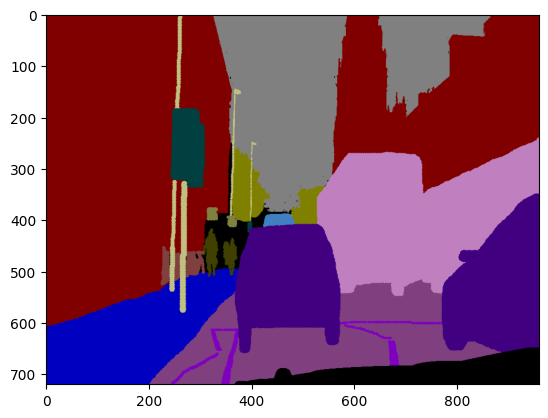

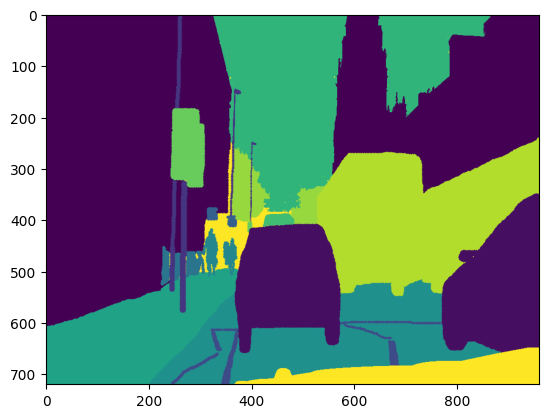

(np.uint8(4), np.uint8(30))

In [9]:
import pandas as pd
df = pd.read_csv(f'{BASE_DIR}/class_dict.csv')
COLOR_MAP = df[['r', 'g', 'b']].values
len(COLOR_MAP)
#---------------------------------------------------------------------------
import cv2
import matplotlib.pyplot as plt

img=f'{BASE_DIR}/test_labels/0001TP_006690_L.png'
img=cv2.imread(img)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
h, w, _ = img.shape
mask = np.zeros((h, w), dtype=np.uint8)

#-----------------------------------------------------------------
for class_id, target_color in enumerate(COLOR_MAP):
    matches = np.all(img == target_color, axis=-1)
    mask[matches] = class_id
plt.imshow(mask)
plt.show()

mask.min() , mask.max()